In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
from tensorflow import  keras
from tensorflow_hub import KerasLayer

# Exploratory Data Analysis

In [6]:
train_folder_path='train\\'
test_folder_path='test\\'
validation_folder_path='valid\\'

In [7]:
train_filespath=glob.glob(train_folder_path+'*.jpg')

In [8]:
np.random.shuffle(train_filespath)

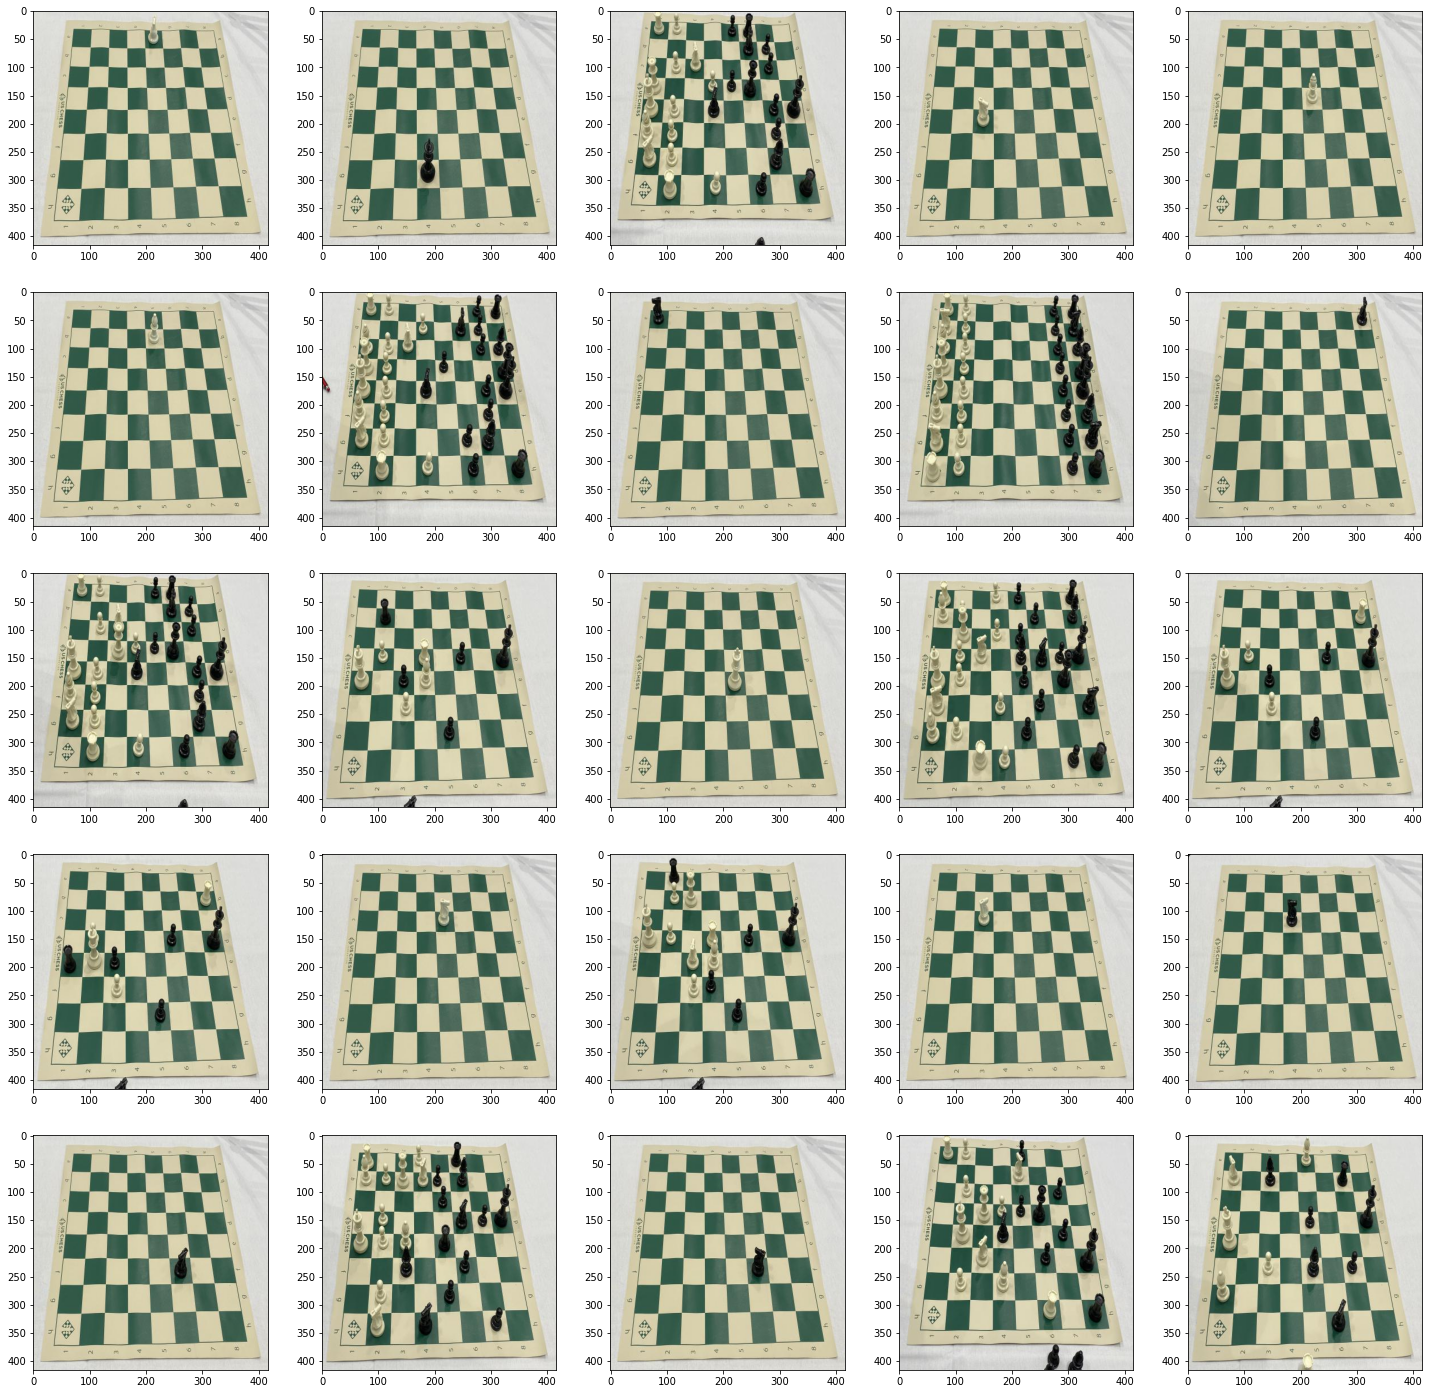

In [9]:
fig,ax= plt.subplots(5,5,figsize=(25,25))
for axes, path in zip(ax.flatten(),train_filespath):
    img=Image.open(path)
    axes.imshow(np.array(img))
    

In [10]:
df_train=pd.read_csv('train\_classes.csv')
df_train.head()

,filename,black-bishop,black-king,black-knight,black-pawn,black-queen,black-rook,white-bishop,white-king,white-knight,white-pawn,white-queen,white-rook
0,b0f3d66c8be13f5f6aa25b67a06bdcfa_jpg.rf.01b3f3...,0,1,1,1,1,1,1,1,1,1,1,1
1,4de23afff63bc169b4ebe547a9c9b692_jpg.rf.0cf789...,1,1,1,1,1,1,1,1,1,1,1,1
2,36066ba85572ce99198f1a21c2c8bbff_jpg.rf.1bb468...,1,0,1,1,1,1,1,1,1,1,1,1
3,889c420fb266b8d0e817306110042bda_jpg.rf.187d72...,0,1,0,1,1,1,0,1,0,1,0,1
4,5cecd3b3946aac5c713a51e0bd4617c9_jpg.rf.03286d...,1,1,0,1,1,1,1,1,1,1,1,1


(0.0, 130.0)

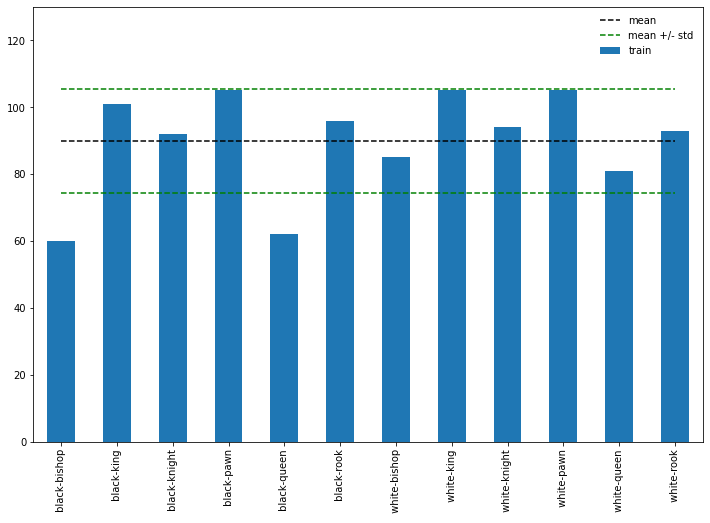

In [11]:
plt.figure(figsize=(12,8))
sample_size=df_train.iloc[:,1:].sum(axis=0)
sample_size.plot(kind='bar',use_index=True,label='train')
plt.plot(sample_size.index,np.ones(len(sample_size))*sample_size.mean(),linestyle='dashed',color='Black',label='mean')
plt.plot(sample_size.index,np.ones(len(sample_size))*(sample_size.mean()-sample_size.std()),linestyle='dashed',color='green',label='mean +/- std')
plt.plot(sample_size.index,np.ones(len(sample_size))*(sample_size.mean()+sample_size.std()),linestyle='dashed',color='green')
plt.legend(frameon=False,loc=1)
plt.ylim(top=130)

### Qualitatitly one can conclude that the train data is balanced.

Text(0.5, 1.0, 'Number of pecies distribution')

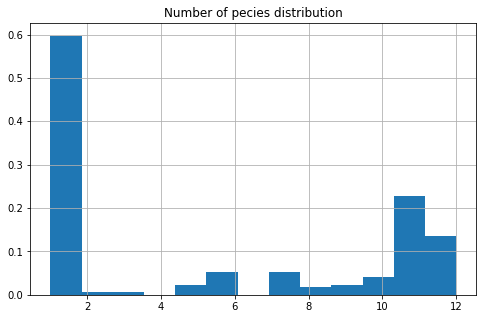

In [12]:
plt.figure(figsize=(8,5))
df_train.iloc[:,1:].sum(axis=1).hist(bins=len(df_train.columns),density=True)
plt.title('Number of pecies distribution')

Text(0.5, 1.0, 'Number of chessboard display with the same label')

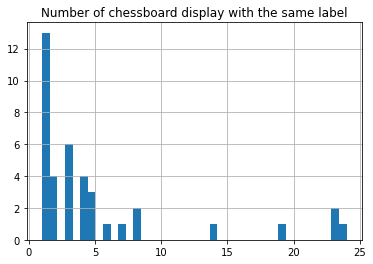

In [13]:
chessboard_displays=df_train.iloc[:,1:].astype(str).agg(''.join,axis=1)
chessboard_displays.groupby(chessboard_displays).count().hist(bins=len(chessboard_displays.unique())+1)
plt.title('Number of chessboard display with the same label')

In [14]:
top5=chessboard_displays.groupby(chessboard_displays).count().sort_values(ascending=False)[:5]
print(top5)

000000001000    24
111111111111    23
001000000000    23
111101111111    19
011111111111    14
dtype: int64


### lets take a look in the top 5 most common arragements

In [15]:
top5_path=df_train.loc[np.where(chessboard_displays.drop_duplicates().isin(top5.index).values==True)]['filename']

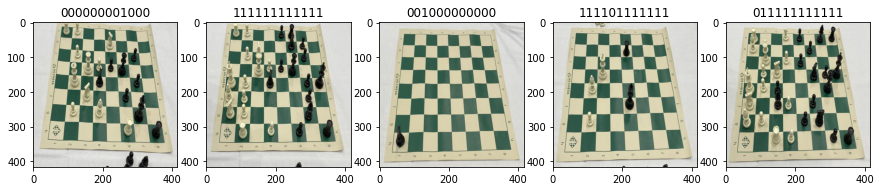

In [16]:
fig,ax= plt.subplots(1,5,figsize=(15,25))
for axes, path,title in zip(ax.flatten(),top5_path,top5.index):
    img=Image.open(train_folder_path+path)
    axes.imshow(np.array(img))
    axes.set_title(title)

#### Due to the game nature is important to highlight that each arrangement can be differente. For exemple, the second image where all pieces are still in the game, there are many ways of this happening. 

## Now the others splits should be analyzed

### test

In [17]:
df_test=pd.read_csv('test\_classes.csv')


(0.0, 22.0)

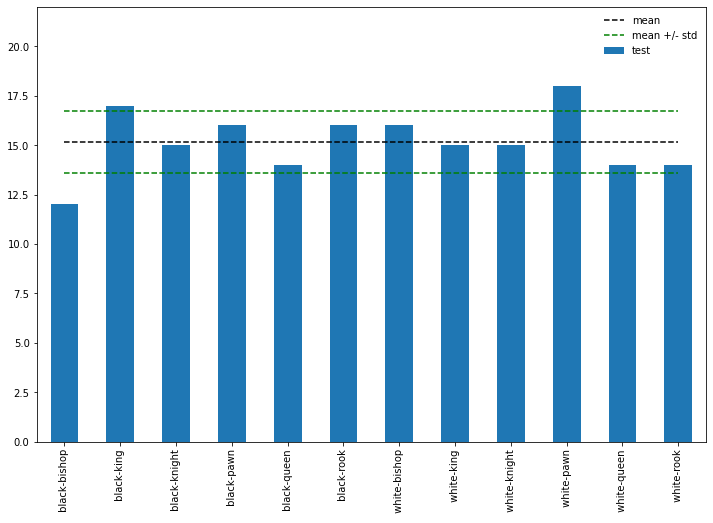

In [18]:
plt.figure(figsize=(12,8))
sample_size=df_test.iloc[:,1:].sum(axis=0)
sample_size.plot(kind='bar',use_index=True,label='test')
plt.plot(sample_size.index,np.ones(len(sample_size))*sample_size.mean(),linestyle='dashed',color='Black',label='mean')
plt.plot(sample_size.index,np.ones(len(sample_size))*(sample_size.mean()-sample_size.std()),linestyle='dashed',color='green',label='mean +/- std')
plt.plot(sample_size.index,np.ones(len(sample_size))*(sample_size.mean()+sample_size.std()),linestyle='dashed',color='green')
plt.legend(frameon=False,loc=1)
plt.ylim(top=22)

Text(0.5, 1.0, 'Number of pecies distribution')

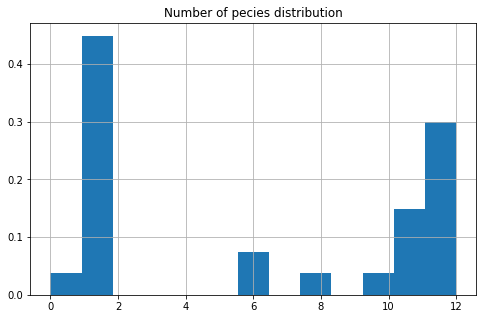

In [19]:
plt.figure(figsize=(8,5))
df_test.iloc[:,1:].sum(axis=1).hist(bins=len(df_test.columns),density=True)
plt.title('Number of pecies distribution')

Text(0.5, 1.0, 'Number of chessboard display with the same label')

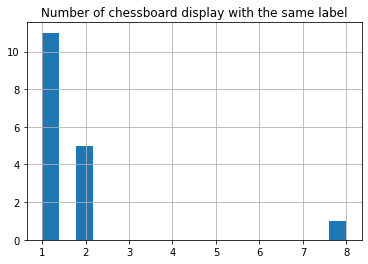

In [20]:
chessboard_displays=df_test.iloc[:,1:].astype(str).agg(''.join,axis=1)
chessboard_displays.groupby(chessboard_displays).count().hist(bins=len(chessboard_displays.unique())+1)
plt.title('Number of chessboard display with the same label')

### validation

In [21]:
df_valid=pd.read_csv('valid\_classes.csv')


(0.0, 33.0)

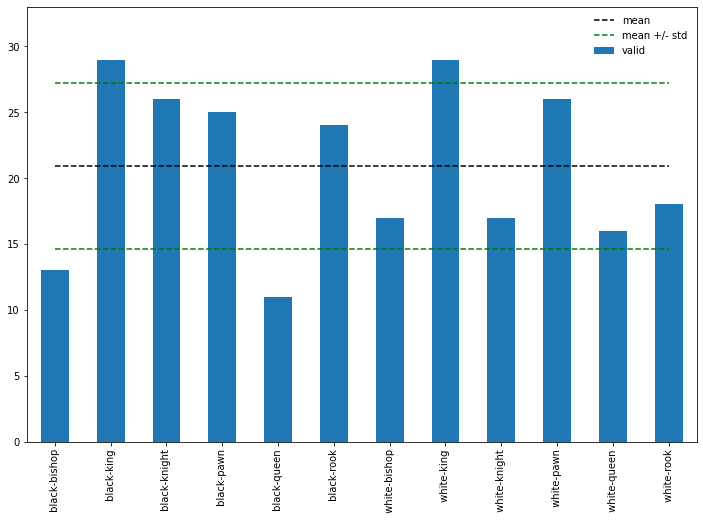

In [22]:
plt.figure(figsize=(12,8))
sample_size=df_valid.iloc[:,1:].sum(axis=0)
sample_size.plot(kind='bar',use_index=True,label='valid')
plt.plot(sample_size.index,np.ones(len(sample_size))*sample_size.mean(),linestyle='dashed',color='Black',label='mean')
plt.plot(sample_size.index,np.ones(len(sample_size))*(sample_size.mean()-sample_size.std()),linestyle='dashed',color='green',label='mean +/- std')
plt.plot(sample_size.index,np.ones(len(sample_size))*(sample_size.mean()+sample_size.std()),linestyle='dashed',color='green')
plt.legend(frameon=False,loc=1)
plt.ylim(top=33)

# Defining functions to read and transform data

In [23]:
def load_img(path):
    img=Image.open(path)
    return img

def resize(img,nw,nh):
    nimg=img.resize((nw,nh))
    return nimg

def get_Y(df,paths):
    df.index=df.filename
    Y=df[df.columns[1:]].loc[paths].values
    return Y

def preprocessing(df,folder_path,nw,nh):
    paths=df['filename']
    X=[]
    for path in paths:
        img=load_img(folder_path+path)
        img=resize(img,nw,nh)
        array=np.array(img)
        X.append(array)
    Y=get_Y(df,paths)
    X=np.array(X).reshape(nw,nh,3,-1)
    return X,Y

# Learning Transfer

In [90]:
model_url='https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'#'https://tfhub.dev/adityakane2001/regnety200mf_classification/1'

In [99]:

Layers= [
    KerasLayer(handle=model_url,input_shape=(224,224,3),trainable=False),
    # keras.layers.Dense(27,activation='softmax'),
    keras.layers.Dense(12,activation='relu')
]

opt=keras.optimizers.Adam(learning_rate=10e-4)
loss=keras.losses.CategoricalCrossentropy()

model=keras.Sequential(Layers)
model.compile(loss=loss,optimizer=opt,metrics=['accuracy'])
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_10 (KerasLayer)  (None, 1001)             3540265   
                                                                 
 dense_9 (Dense)             (None, 12)                12024     
                                                                 
Total params: 3,552,289
Trainable params: 12,024
Non-trainable params: 3,540,265
_________________________________________________________________


In [85]:
Xtrain,Ytrain=preprocessing(df_train,train_folder_path,224,224)
Xtest,Ytest=preprocessing(df_test,test_folder_path,224,224)
Xvalid,Yvalid=preprocessing(df_valid,validation_folder_path,224,224)

Xtrain=Xtrain.reshape(202,224,224,3)
Xtest=Xtest.reshape(-1,224,224,3)
Xvalid=Xvalid.reshape(-1,224,224,3)

In [81]:
Xvalid.shape

(58, 224, 224, 3)

In [78]:
Ytrain.shape

(202, 12)

In [100]:
history=model.fit(Xtrain,Ytrain,epochs=50,batch_size=20,validation_data=(Xvalid,Yvalid))

Epoch 1/50
11/11 [==============================] - 7s 439ms/step - loss: 40.1682 - accuracy: 0.0594 - val_loss: 30.2838 - val_accuracy: 0.1207
Epoch 2/50
11/11 [==============================] - 4s 378ms/step - loss: 37.8221 - accuracy: 0.1436 - val_loss: 30.2365 - val_accuracy: 0.1034
Epoch 3/50
11/11 [==============================] - 4s 374ms/step - loss: 37.8017 - accuracy: 0.1337 - val_loss: 30.2112 - val_accuracy: 0.1034
Epoch 4/50
11/11 [==============================] - 4s 370ms/step - loss: 37.7899 - accuracy: 0.1436 - val_loss: 30.1986 - val_accuracy: 0.2241
Epoch 5/50
11/11 [==============================] - 4s 361ms/step - loss: 37.7795 - accuracy: 0.1881 - val_loss: 30.1922 - val_accuracy: 0.2241
Epoch 6/50
11/11 [==============================] - 4s 363ms/step - loss: 37.7718 - accuracy: 0.1485 - val_loss: 30.1857 - val_accuracy: 0.0517
Epoch 7/50
11/11 [==============================] - 4s 362ms/step - loss: 37.7664 - accuracy: 0.1584 - val_loss: 30.1846 - val_accuracy:

In [101]:
def plot(history):
    pass

In [ ]:
Xtrain.shape

(224, 244, 3, 202)